In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
#Dataset used - https://www.kaggle.com/datasets/hellbuoy/car-price-prediction/data
Data = pd.read_csv("Datasets/Car_prices.csv")
Data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
cols = ['car_ID','symboling','CarName','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation',
        'wheelbase','carlength','carwidth','carheight','curbweight','enginetype','cylindernumber','enginesize','fuelsystem','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']

In [4]:
df = pd.DataFrame(Data,columns=cols)
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
df.describe

<bound method NDFrame.describe of      car_ID  symboling                   CarName fueltype aspiration  \
0         1          3        alfa-romero giulia      gas        std   
1         2          3       alfa-romero stelvio      gas        std   
2         3          1  alfa-romero Quadrifoglio      gas        std   
3         4          2               audi 100 ls      gas        std   
4         5          2                audi 100ls      gas        std   
..      ...        ...                       ...      ...        ...   
200     201         -1           volvo 145e (sw)      gas        std   
201     202         -1               volvo 144ea      gas      turbo   
202     203         -1               volvo 244dl      gas        std   
203     204         -1                 volvo 246   diesel      turbo   
204     205         -1               volvo 264gl      gas      turbo   

    doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0          two  convertible 

In [6]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [7]:
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [8]:
df.drop(columns=['car_ID','symboling','CarName','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','fuelsystem'],inplace=True)

In [9]:
df.head()

,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,four,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,four,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,94.5,171.2,65.5,52.4,2823,six,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,99.8,176.6,66.2,54.3,2337,four,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,99.4,176.6,66.4,54.3,2824,five,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [10]:
cylinder_mapping = {'two':2, 'three':3, 'four':4, 'five':5, 'six':6, 'eight':8, 'twelve':12}
df['cylindernumber'] = df['cylindernumber'].map(cylinder_mapping)
df.head()

,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22,17450.0


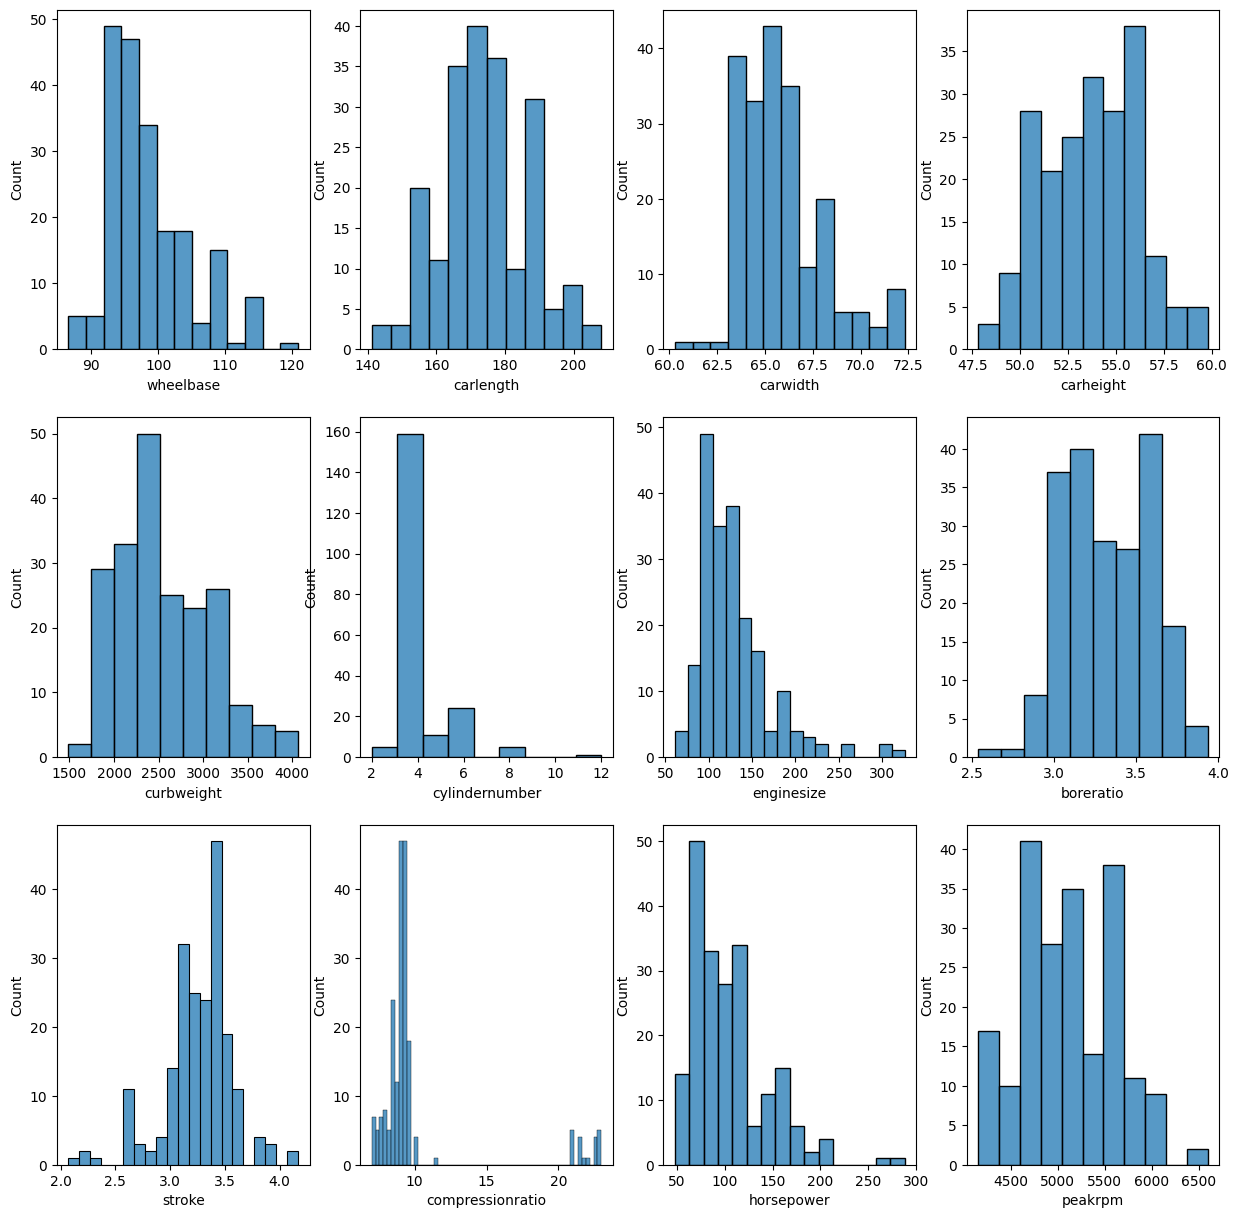

In [11]:
figure, axs = plt.subplots(3, 4)
figure.set_size_inches(15, 15)
cols = df.columns

for i in range(3):
    for j in range(4):
        sns.histplot(df[cols[4*i+j]], ax=axs[i, j])

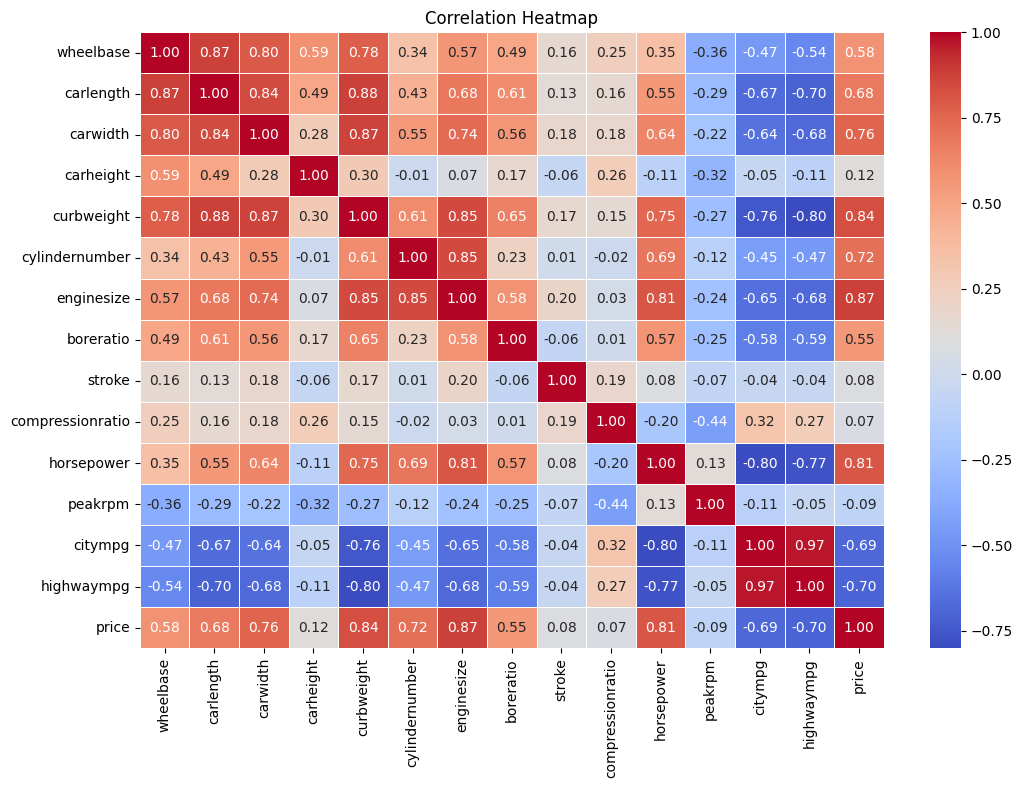

In [12]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


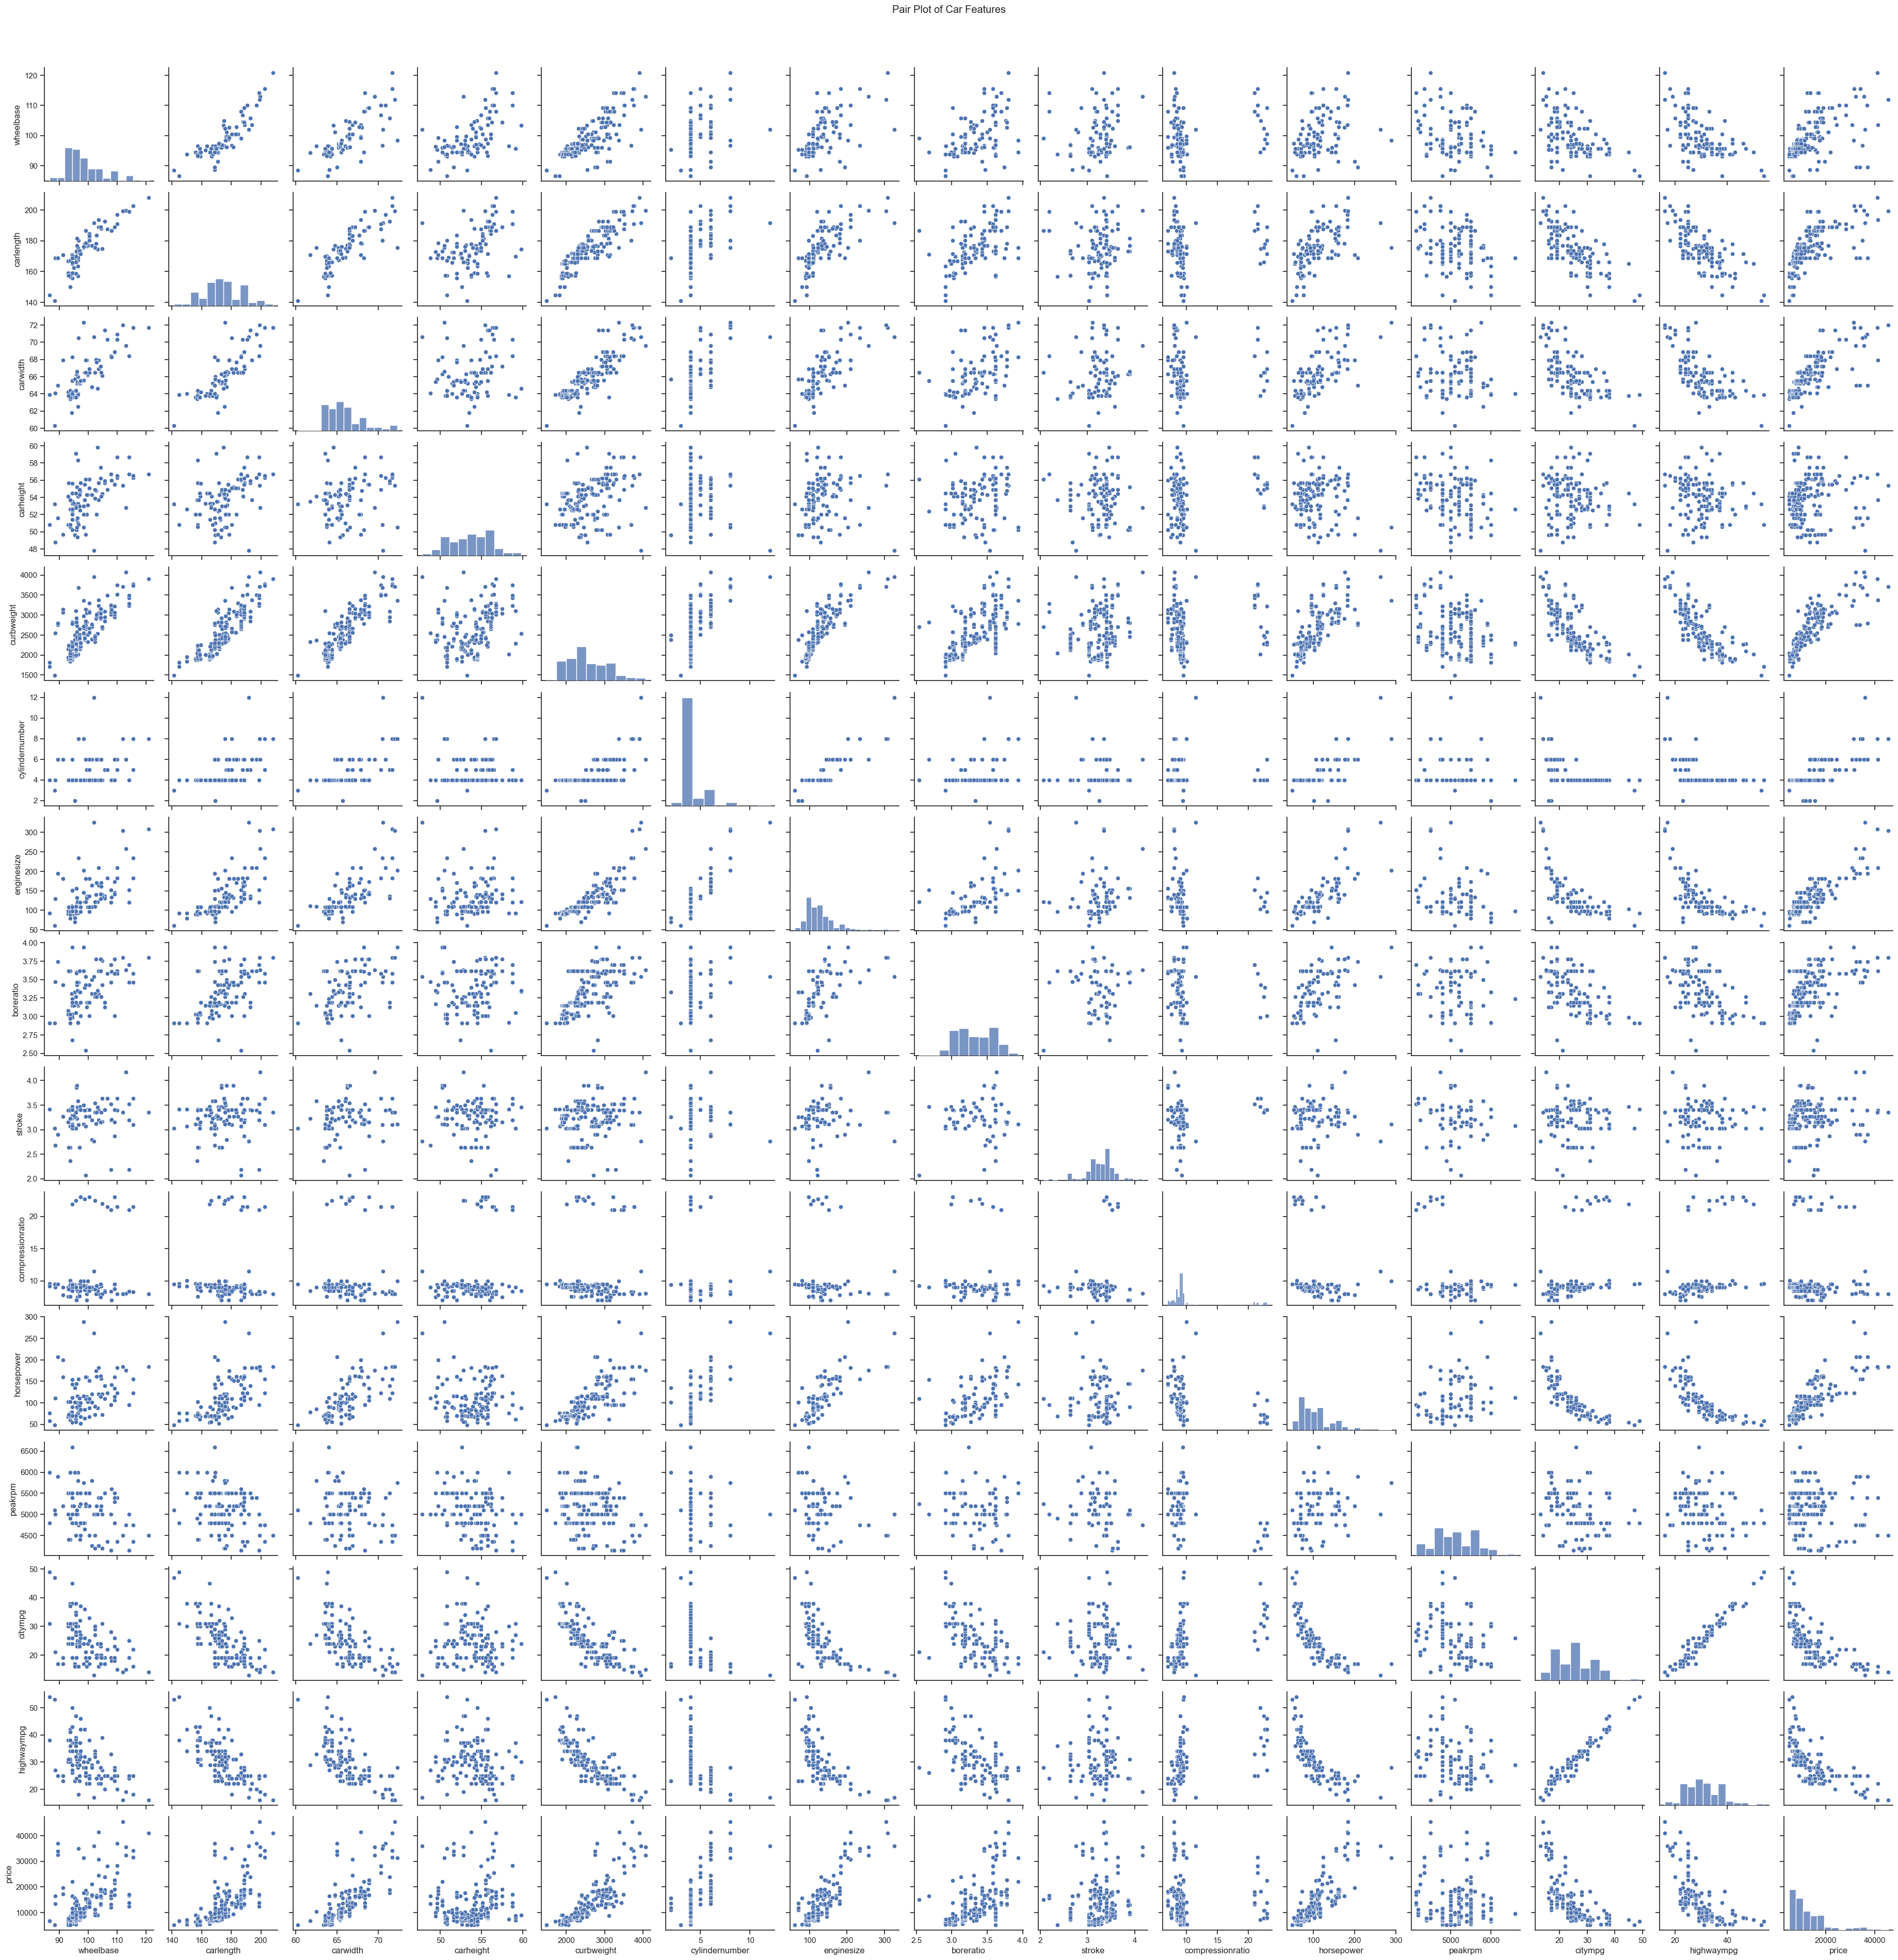

In [19]:
sns.set(style="ticks", color_codes=True)
pair_plot = sns.pairplot(df)
plt.suptitle('Pair Plot of Car Features', y=1.02)
plt.show()

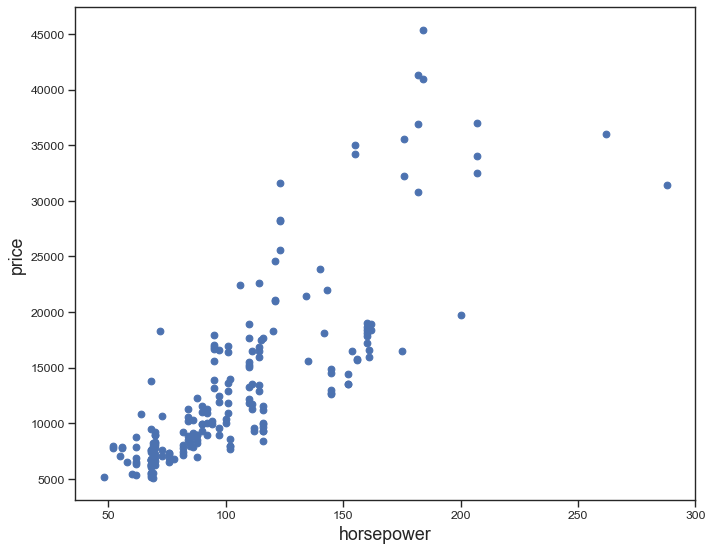

In [20]:
x = df["horsepower"].values.reshape(-1,1)
y = df["price"].values.reshape(-1,1)
plt.figure(figsize=(10,8),dpi = 80)
plt.scatter(x,y)
plt.xlabel("horsepower",size = 16)
plt.ylabel("price",size = 16)
plt.show()

In [21]:
from sklearn.model_selection import train_test_split
x_train , x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)
x_train , x_test, y_train, y_test

(array([[ 72],
        [ 95],
        [ 62],
        [ 69],
        [ 86],
        [ 68],
        [ 73],
        [ 95],
        [145],
        [ 70],
        [161],
        [ 55],
        [ 92],
        [ 69],
        [110],
        [116],
        [101],
        [207],
        [ 68],
        [ 82],
        [160],
        [ 92],
        [175],
        [ 73],
        [ 76],
        [121],
        [ 76],
        [143],
        [100],
        [ 70],
        [160],
        [ 73],
        [ 68],
        [ 95],
        [112],
        [101],
        [145],
        [ 68],
        [102],
        [ 68],
        [160],
        [114],
        [142],
        [154],
        [ 68],
        [ 90],
        [ 68],
        [207],
        [ 88],
        [ 69],
        [ 76],
        [ 95],
        [ 84],
        [ 68],
        [110],
        [ 68],
        [ 76],
        [101],
        [162],
        [ 70],
        [110],
        [102],
        [207],
        [114],
        [ 82],
        [115],
        [ 

In [22]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [23]:
y_predict = model.predict(x_test)
y_predict = y_predict.round(0)
y_predict

array([[25294.],
       [21859.],
       [12021.],
       [14051.],
       [16081.],
       [ 7648.],
       [ 5618.],
       [ 7804.],
       [11552.],
       [ 4994.],
       [14051.],
       [ 7804.],
       [15612.],
       [11240.],
       [25607.],
       [ 6555.],
       [ 4369.],
       [19517.],
       [10615.],
       [11552.],
       [ 9991.],
       [20610.],
       [ 7648.],
       [ 5930.],
       [ 7492.],
       [25294.],
       [14988.],
       [14676.],
       [ 7648.],
       [14676.],
       [16081.],
       [ 7492.],
       [ 6555.],
       [17799.],
       [12802.],
       [16081.],
       [14207.],
       [12645.],
       [ 7804.],
       [19517.],
       [ 9678.]])

In [24]:
x_test = np.reshape(x_test,(x_test.shape[0]))
y_test = np.reshape(y_test,(y_test.shape[0]))
y_predict = np.reshape(y_predict,(y_predict.shape[0]))
df1 = pd.DataFrame({"X":x_test,"Actual":y_test,"Predict":y_predict})
df1

,X,Actual,Predict
0,182,30760.000,25294.0
1,160,17859.167,21859.0
2,97,9549.000,12021.0
3,110,11850.000,14051.0
4,123,28248.000,16081.0
5,69,7799.000,7648.0
6,56,7788.000,5618.0
7,70,9258.000,7804.0
8,94,10198.000,11552.0
9,52,7775.000,4994.0


In [25]:
from sklearn import metrics
print("Explaind variance:", metrics.explained_variance_score(y_test,y_predict))
print("Max error:",metrics.max_error(y_test,y_predict))
print("Mean absolute error:",metrics.mean_absolute_error(y_test,y_predict))
print("Mean squared error:",metrics.mean_squared_error(y_test,y_predict,squared=True))

print("R-2 score:",metrics.r2_score(y_test,y_predict))

Explaind variance: 0.6392159124817274
Max error: 16021.0
Mean absolute error: 3602.0325121951214
Mean squared error: 29003934.909216806
R-2 score: 0.6326012459711112


In [1]:
install.packages("ggplot2")
install.packages("dplyr")
install.packages("GGally")

Installing package into 'C:/Users/ATHARVA/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)



package 'ggplot2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\ATHARVA\AppData\Local\Temp\RtmpaGDlmI\downloaded_packages


Installing package into 'C:/Users/ATHARVA/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)



package 'dplyr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\ATHARVA\AppData\Local\Temp\RtmpaGDlmI\downloaded_packages


Installing package into 'C:/Users/ATHARVA/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)



package 'GGally' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\ATHARVA\AppData\Local\Temp\RtmpaGDlmI\downloaded_packages


In [8]:
library(ggplot2)
library(dplyr)
library(GGally)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



In [3]:
data <- read.csv("Datasets/Car_prices.csv")
data

car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,⋯,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,⋯,<int>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>
1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,⋯,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495.00
2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,⋯,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500.00
3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,⋯,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500.00
4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,⋯,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950.00
5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,⋯,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450.00
6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,⋯,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250.00
7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,⋯,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710.00
8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,⋯,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920.00
9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,⋯,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875.00


In [4]:
summary(data)

     car_ID      symboling         CarName            fueltype        
 Min.   :  1   Min.   :-2.0000   Length:205         Length:205        
 1st Qu.: 52   1st Qu.: 0.0000   Class :character   Class :character  
 Median :103   Median : 1.0000   Mode  :character   Mode  :character  
 Mean   :103   Mean   : 0.8341                                        
 3rd Qu.:154   3rd Qu.: 2.0000                                        
 Max.   :205   Max.   : 3.0000                                        
  aspiration         doornumber          carbody           drivewheel       
 Length:205         Length:205         Length:205         Length:205        
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                         

In [6]:
data <- data[, -c(1,2,3,4,5,6,7,8,9)]

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwid

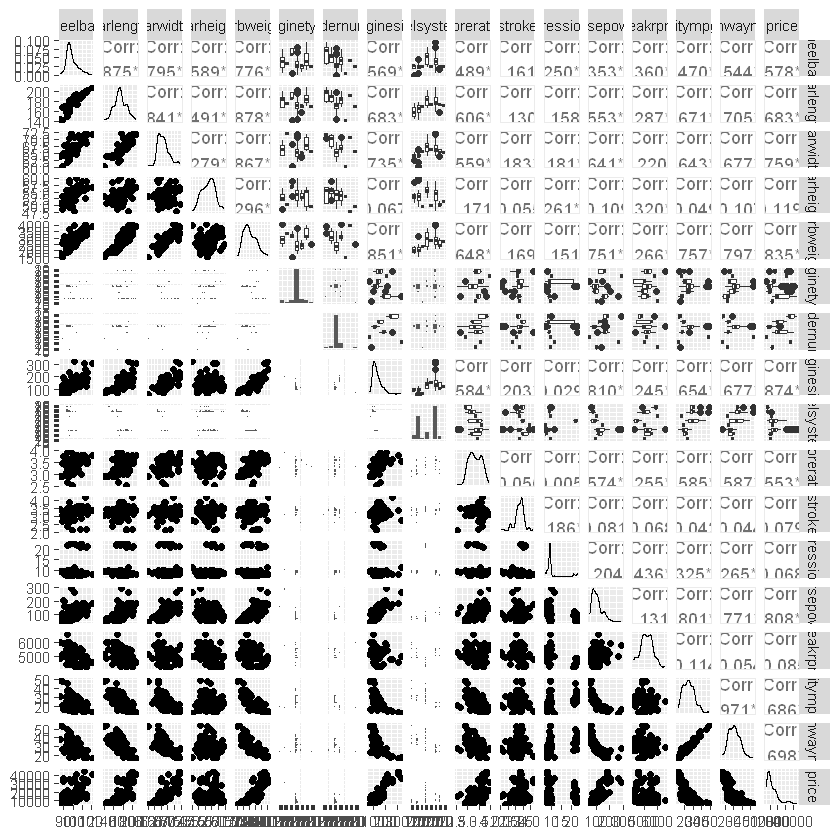

In [9]:
ggpairs(data,cardinality_threshold = 30)